In [100]:

import os, types
import pandas as pd
from botocore.client import Config
import ibm_boto3

def __iter__(self): return 0

# @hidden_cell
# The following code accesses a file in your IBM Cloud Object Storage. It includes your credentials.
# You might want to remove those credentials before you share the notebook.
cos_client = ibm_boto3.client(service_name='s3',
    ibm_api_key_id='OhaCaq1Z53czuhOw6dbDxFRltziteAxiZrDM8d1F2Ab-',
    ibm_auth_endpoint="https://iam.cloud.ibm.com/oidc/token",
    config=Config(signature_version='oauth'),
    endpoint_url='https://s3.private.ap.cloud-object-storage.appdomain.cloud')

bucket = 'universityadmiteligibilitypredict-donotdelete-pr-mzurtmochnbbb9'
object_key = 'new_dataset.csv'

body = cos_client.get_object(Bucket=bucket,Key=object_key)['Body']
# add missing __iter__ method, so pandas accepts body as file-like object
if not hasattr(body, "__iter__"): body.__iter__ = types.MethodType( __iter__, body )

df = pd.read_csv(body)
df.head()

,Unnamed: 0,COMMUNITY,RANK,COM.RANK,AGGR MARK,COLLEGE CODE,BRANCH CODE
0,1,BC,5,3.0,200.00,1,CS
1,2,SC,7,1.0,200.00,1,CS
2,3,BC,8,4.0,200.00,1,CS
3,4,BC,10,6.0,200.00,1,EC
4,6,OC,12,8.0,199.75,1,EE


In [101]:
df

,Unnamed: 0,COMMUNITY,RANK,COM.RANK,AGGR MARK,COLLEGE CODE,BRANCH CODE
0,1,BC,5,3.000000,200.000,1,CS
1,2,SC,7,1.000000,200.000,1,CS
2,3,BC,8,4.000000,200.000,1,CS
3,4,BC,10,6.000000,200.000,1,EC
4,6,OC,12,8.000000,199.750,1,EE
...,...,...,...,...,...,...,...
72704,9213,MBC,14514,5905.195401,184.580,0,CE
72705,9214,OC,14517,5905.195401,184.570,0,CS
72706,9215,BC,14519,5905.195401,184.550,0,PR
72707,9216,BC,14521,5905.195401,184.535,0,CS


In [102]:
df = df.drop(['Unnamed: 0'],axis=1)

In [103]:
df

,COMMUNITY,RANK,COM.RANK,AGGR MARK,COLLEGE CODE,BRANCH CODE
0,BC,5,3.000000,200.000,1,CS
1,SC,7,1.000000,200.000,1,CS
2,BC,8,4.000000,200.000,1,CS
3,BC,10,6.000000,200.000,1,EC
4,OC,12,8.000000,199.750,1,EE
...,...,...,...,...,...,...
72704,MBC,14514,5905.195401,184.580,0,CE
72705,OC,14517,5905.195401,184.570,0,CS
72706,BC,14519,5905.195401,184.550,0,PR
72707,BC,14521,5905.195401,184.535,0,CS


In [104]:
df = df.drop(['BRANCH CODE'],axis=1)

In [105]:
dfc1 = df.loc[df['COLLEGE CODE'] == 1]

In [106]:
dfc1

,COMMUNITY,RANK,COM.RANK,AGGR MARK,COLLEGE CODE
0,BC,5,3.000000,200.00,1
1,SC,7,1.000000,200.00,1
2,BC,8,4.000000,200.00,1
3,BC,10,6.000000,200.00,1
4,OC,12,8.000000,199.75,1
...,...,...,...,...,...
64250,MBC,14172,5905.195401,185.00,1
64251,SC,14245,5905.195401,185.00,1
64252,BCM,14321,5905.195401,185.00,1
64253,SCA,14390,5905.195401,185.00,1


In [107]:
dfc2 = df.loc[df['COLLEGE CODE'] == 0]

In [108]:
dfc2

,COMMUNITY,RANK,COM.RANK,AGGR MARK,COLLEGE CODE
1014,BC,11,7.000000,199.750,0
1015,BC,17,11.000000,199.750,0
1016,BC,30,18.000000,199.750,0
1017,BC,33,20.000000,199.750,0
1018,BCM,44,2.000000,199.500,0
...,...,...,...,...,...
72704,MBC,14514,5905.195401,184.580,0
72705,OC,14517,5905.195401,184.570,0
72706,BC,14519,5905.195401,184.550,0
72707,BC,14521,5905.195401,184.535,0


In [109]:
dfc2 = dfc2.sample(frac = 1)

In [110]:
dfc2 = dfc2.head(4500)

In [111]:
df = pd.concat([dfc1,dfc2], axis=0)

In [112]:
df

,COMMUNITY,RANK,COM.RANK,AGGR MARK,COLLEGE CODE
0,BC,5,3.000000,200.000,1
1,SC,7,1.000000,200.000,1
2,BC,8,4.000000,200.000,1
3,BC,10,6.000000,200.000,1
4,OC,12,8.000000,199.750,1
...,...,...,...,...,...
10939,BC,16337,9795.000000,185.500,0
56313,MBCDNC,22908,5905.195401,182.295,0
24085,BC,7204,4262.000000,182.000,0
32994,MBC,11307,5905.195401,176.000,0


In [113]:
df = df.sample(frac = 1)

In [114]:
df.isna().any()

COMMUNITY       False
RANK            False
COM.RANK        False
AGGR MARK       False
COLLEGE CODE    False
dtype: bool

In [115]:
df.COMMUNITY.unique()

array(['BC', 'SC', 'MBC', 'MBCDNC', 'MBCV', 'OC', 'BCM', 'SCA', 'MBC/DNC',
       'ST'], dtype=object)

In [116]:
community = {'BC':1,'SC':2,'OC':3,'BCM':4,'MBC':5,'SCA':6,'ST':7,'MBC/DNC':5,'MBCV':5,'MBCDNC':5}

In [117]:
df.COMMUNITY = [community[item] for item in df.COMMUNITY]

In [118]:
df

,COMMUNITY,RANK,COM.RANK,AGGR MARK,COLLEGE CODE
8846,1,13137,7920.000000,188.00,0
43149,2,3515,5905.195401,192.50,0
26779,2,4681,5905.195401,188.00,1
342,1,953,639.000000,197.75,1
682,5,3649,717.000000,195.00,1
...,...,...,...,...,...
19838,1,5329,3125.000000,185.00,1
6940,5,12217,2527.000000,188.75,1
3527,1,4870,3026.000000,194.00,0
20902,1,2088,1261.000000,190.00,0


In [119]:
df.describe()

,COMMUNITY,RANK,COM.RANK,AGGR MARK,COLLEGE CODE
count,9306.000000,9306.000000,9306.000000,9306.000000,9306.000000
mean,2.372448,8603.572534,4932.868409,188.390774,0.516441
std,1.728203,8668.409153,4892.311894,8.207379,0.499756
min,1.000000,1.000000,1.000000,151.500000,0.000000
25%,1.000000,1477.000000,2437.000000,183.500000,0.000000
50%,1.000000,5719.000000,5905.195401,190.000000,1.000000
75%,4.000000,13319.500000,5905.195401,194.500000,1.000000
max,7.000000,44781.000000,149035.000000,200.000000,1.000000


In [120]:
import matplotlib.pyplot as plt
import seaborn as sns

In [121]:
all_columns = ['COMMUNITY', 'RANK', 'AGGR MARK','COM.RANK','COLLEGE CODE']
target = 'COLLEGE CODE'
columns = ['COMMUNITY', 'RANK', 'AGGR MARK','COM.RANK']

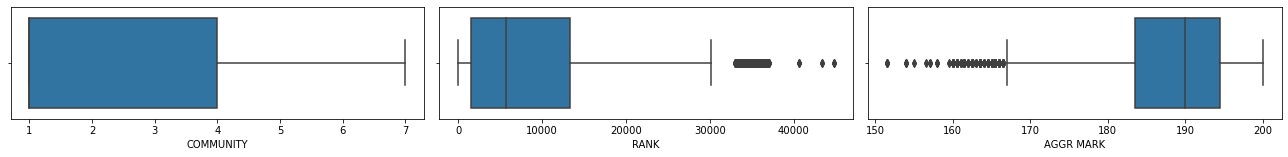

In [122]:
fig = plt.figure(figsize=(18, 4))
fig.subplots_adjust(hspace=1)

for i in range(len(columns)-1):
    plt.subplot(2, 3, i+1)
    sns.boxplot(df[columns[i]])
plt.tight_layout() 

<AxesSubplot:xlabel='COM.RANK'>

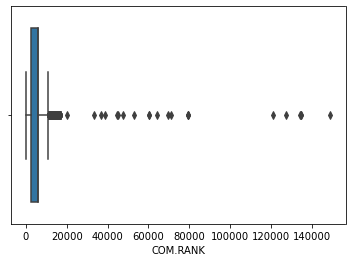

In [123]:
sns.boxplot(df['COM.RANK'])

In [124]:
dfs = df.sort_values(['RANK','AGGR MARK'],ascending=[True,False])

In [125]:
dfs

,COMMUNITY,RANK,COM.RANK,AGGR MARK,COLLEGE CODE
40279,5,1,5905.195401,200.0000,1
63491,1,1,5905.195401,200.0000,1
19109,1,1,1.000000,200.0000,1
26049,1,1,5905.195401,199.6667,1
26050,3,2,5905.195401,199.6667,1
...,...,...,...,...,...
63408,1,43309,5905.195401,174.6350,0
63448,1,44743,5905.195401,174.1300,0
63453,1,44749,5905.195401,174.1300,0
50492,6,44774,5905.195401,174.1200,1


In [126]:
from sklearn.linear_model import LogisticRegression

In [127]:
import tensorflow as tf
import pandas as pd


In [128]:
from sklearn.model_selection import train_test_split
import numpy as np

In [129]:
x = dfs.drop(['COLLEGE CODE'],axis=1)
label = dfs['COLLEGE CODE']

In [130]:
x

,COMMUNITY,RANK,COM.RANK,AGGR MARK
40279,5,1,5905.195401,200.0000
63491,1,1,5905.195401,200.0000
19109,1,1,1.000000,200.0000
26049,1,1,5905.195401,199.6667
26050,3,2,5905.195401,199.6667
...,...,...,...,...
63408,1,43309,5905.195401,174.6350
63448,1,44743,5905.195401,174.1300
63453,1,44749,5905.195401,174.1300
50492,6,44774,5905.195401,174.1200


In [131]:
label

40279    1
63491    1
19109    1
26049    1
26050    1
        ..
63408    0
63448    0
63453    0
50492    1
63472    0
Name: COLLEGE CODE, Length: 9306, dtype: int64

In [132]:
from sklearn.metrics import accuracy_score
from sklearn.tree import DecisionTreeClassifier

In [133]:
X_train, X_test, y_train, y_test = train_test_split(x, label, test_size=0.33, random_state=42)

In [144]:
y_train

589      1
55341    0
14837    0
19797    1
284      1
        ..
24958    0
45366    0
45644    0
40468    1
9843     0
Name: COLLEGE CODE, Length: 6235, dtype: int64

In [134]:
dt = DecisionTreeClassifier(random_state=0)
dt.fit(X_train, y_train)
dt_pred = dt.predict(X_test)
print("Accuracy of Decision Tree Classifier: ", accuracy_score(y_test, dt_pred))

Accuracy of Decision Tree Classifier:  0.7368935200260501


In [135]:
pr = dt.predict([[5,2700,700,189.5]])
print(pr)

[1]


In [137]:
!pip install ibm_watson_machine_learning

In [138]:
from ibm_watson_machine_learning import APIClient
wml_credentials = {
    "url" : "https://jp-tok.ml.cloud.ibm.com",
    "apikey" : "ol1OfHga50TuuERb3SpiogZUo8O2-iMmAtehGzW6Fes3"
}
client = APIClient(wml_credentials)

In [139]:
def guid_from_space_name(client, space_name):
    space = client.spaces.get_details()
    return (next(item for item in space['resources'] if item['entity']['name'] == space_name)['metadata']['id'])

In [140]:
space_uid = guid_from_space_name(client,'models')
print("Space UID = " + space_uid)

Space UID = 46ea79d1-af79-49e3-8daa-2bad5ab5c86b


In [141]:
client.set.default_space(space_uid)

'SUCCESS'

In [96]:
client.software_specifications.list()

-----------------------------  ------------------------------------  ----
NAME                           ASSET_ID                              TYPE
default_py3.6                  0062b8c9-8b7d-44a0-a9b9-46c416adcbd9  base
kernel-spark3.2-scala2.12      020d69ce-7ac1-5e68-ac1a-31189867356a  base
pytorch-onnx_1.3-py3.7-edt     069ea134-3346-5748-b513-49120e15d288  base
scikit-learn_0.20-py3.6        09c5a1d0-9c1e-4473-a344-eb7b665ff687  base
spark-mllib_3.0-scala_2.12     09f4cff0-90a7-5899-b9ed-1ef348aebdee  base
pytorch-onnx_rt22.1-py3.9      0b848dd4-e681-5599-be41-b5f6fccc6471  base
ai-function_0.1-py3.6          0cdb0f1e-5376-4f4d-92dd-da3b69aa9bda  base
shiny-r3.6                     0e6e79df-875e-4f24-8ae9-62dcc2148306  base
tensorflow_2.4-py3.7-horovod   1092590a-307d-563d-9b62-4eb7d64b3f22  base
pytorch_1.1-py3.6              10ac12d6-6b30-4ccd-8392-3e922c096a92  base
tensorflow_1.15-py3.6-ddl      111e41b3-de2d-5422-a4d6-bf776828c4b7  base
autoai-kb_rt22.2-py3.10        125b6d9

In [142]:
software_spec_uid = client.software_specifications.get_uid_by_name("runtime-22.1-py3.9")
software_spec_uid

'12b83a17-24d8-5082-900f-0ab31fbfd3cb'

In [98]:
model_details = client.repository.store_model(model = dt, meta_props={
    client.repository.ModelMetaNames.NAME: "UAEP_Decision_Tree",
    client.repository.ModelMetaNames.TYPE: "scikit-learn_1.0",
    client.repository.ModelMetaNames.SOFTWARE_SPEC_UID: software_spec_uid
}
)

model_id = client.repository.get_model_id(model_details)

In [99]:
model_id

'b4c404ae-0a1a-4e7d-a915-e4db8a01a848'

In [147]:
import requests

# NOTE: you must manually set API_KEY below using information retrieved from your IBM Cloud account.
API_KEY = "ol1OfHga50TuuERb3SpiogZUo8O2-iMmAtehGzW6Fes3"
token_response = requests.post('https://iam.cloud.ibm.com/identity/token', data={"apikey":
 API_KEY, "grant_type": 'urn:ibm:params:oauth:grant-type:apikey'})
mltoken = token_response.json()["access_token"]

header = {'Content-Type': 'application/json', 'Authorization': 'Bearer ' + mltoken}

# NOTE: manually define and pass the array(s) of values to be scored in the next line
payload_scoring = {"input_data": [{"field": [["COMMUNITY","RANK","COM.RANK","AGGR MARK"]], "values": [[5,2700,700,189.5]]}]}

response_scoring = requests.post('https://jp-tok.ml.cloud.ibm.com/ml/v4/deployments/afcd0e3a-e61f-4f67-b927-9e01f1ade078/predictions?version=2022-11-22', json=payload_scoring,
 headers={'Authorization': 'Bearer ' + mltoken})
print("Scoring response")
print(response_scoring.json())

Scoring response
{'predictions': [{'fields': ['prediction', 'probability'], 'values': [[1, [0.0, 1.0]]]}]}


In [149]:
prediction = response_scoring.json()['predictions'][0]['values'][0][0]
prediction

1

In [136]:
pred = dt.predict([[5,30100,350,180]])
print(pred)

[0]
